# Covid-19: Choropleth Visualization

In [1]:
#import required libraries.
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
import plotly.express as px
from datetime import datetime as dt
from datetime import timedelta

In [2]:
covid = pd.read_csv("covid-states.csv")
covid.head()

date state dataQualityGrade   death  deathConfirmed  deathIncrease  \
0  2020-12-02    AK                A   122.0           122.0              0   
1  2020-12-02    AL                A  3711.0          3326.0             73   
2  2020-12-02    AR               A+  2522.0          2312.0             10   
3  2020-12-02    AS                D     0.0             NaN              0   
4  2020-12-02    AZ               A+  6739.0          6237.0             52   

   deathProbable  hospitalized  hospitalizedCumulative  hospitalizedCurrently  \
0            NaN         768.0                   768.0                  164.0   
1          385.0       25821.0                 25821.0                 1801.0   
2          210.0        9110.0                  9110.0                 1088.0   
3            NaN           NaN                     NaN                    NaN   
4          502.0       26312.0                 26312.0                 2699.0   

   ...  totalTestResults  totalTestResultsIncrease  totalTestsAntibody  \
0  ...         1024643.0                      6015                 NaN   
1  ...         1603523.0                      9681                 NaN   
2  ...         1703266.0                     11813                 NaN   
3  ...            1988.0                         0                 NaN   
4  ...         2288204.0                     16290            365871.0   

   totalTestsAntigen  totalTestsPeopleAntibody  totalTestsPeopleAntigen  \
0                NaN                       NaN                      NaN   
1                NaN                   73187.0                      NaN   
2            21856.0                       NaN                 144866.0   
3                NaN                       NaN                      NaN   
4                NaN                       NaN                      NaN   

   totalTestsPeopleViral  totalTestsPeopleViralIncrease  totalTestsViral  \
0                    NaN                              0        1024643.0   
1              1603523.0                           9681              NaN   
2                    NaN                              0        1703266.0   
3                    NaN                              0           1988.0   
4              2288204.0                          16290              NaN   

   totalTestsViralIncrease  
0                     6015  
1                        0  
2                    11813  
3                        0  
4                        0  

[5 rows x 42 columns]

In [3]:
# clean dataframes 
covid.drop('dataQualityGrade',axis = 1, inplace = True)

In [4]:
covid.rename(columns = {'state':'abbrev'}, inplace = True)

In [5]:
# Cut the data by date - start date March end date December
start_date = '2020-03-20'
end_date = '2020-12-02'
mask = (covid['date'] > start_date) & (covid['date'] <= end_date)
covid  = covid.loc[mask]
covid

date abbrev   death  deathConfirmed  deathIncrease  \
0      2020-12-02     AK   122.0           122.0              0   
1      2020-12-02     AL  3711.0          3326.0             73   
2      2020-12-02     AR  2522.0          2312.0             10   
3      2020-12-02     AS     0.0             NaN              0   
4      2020-12-02     AZ  6739.0          6237.0             52   
...           ...    ...     ...             ...            ...   
14387  2020-03-21     VT     2.0             NaN              0   
14388  2020-03-21     WA   111.0             NaN              7   
14389  2020-03-21     WI     4.0             NaN              1   
14390  2020-03-21     WV     0.0             NaN              0   
14391  2020-03-21     WY     NaN             NaN              0   

       deathProbable  hospitalized  hospitalizedCumulative  \
0                NaN         768.0                   768.0   
1              385.0       25821.0                 25821.0   
2              210.0        9110.0                  9110.0   
3                NaN           NaN                     NaN   
4              502.0       26312.0                 26312.0   
...              ...           ...                     ...   
14387            NaN           NaN                     NaN   
14388            NaN           NaN                     NaN   
14389            NaN           NaN                     NaN   
14390            NaN           1.0                     1.0   
14391            NaN           NaN                     NaN   

       hospitalizedCurrently  hospitalizedIncrease  ...  totalTestResults  \
0                      164.0                    19  ...         1024643.0   
1                     1801.0                   211  ...         1603523.0   
2                     1088.0                    89  ...         1703266.0   
3                        NaN                     0  ...            1988.0   
4                     2699.0                   240  ...         2288204.0   
...                      ...                   ...  ...               ...   
14387                    NaN                     0  ...            1457.0   
14388                    NaN                     0  ...           45706.0   
14389                    NaN                     0  ...            6050.0   
14390                    NaN                     1  ...             341.0   
14391                    NaN                     0  ...            1020.0   

       totalTestResultsIncrease  totalTestsAntibody  totalTestsAntigen  \
0                          6015                 NaN                NaN   
1                          9681                 NaN                NaN   
2                         11813                 NaN            21856.0   
3                             0                 NaN                NaN   
4                         16290            365871.0                NaN   
...                         ...                 ...                ...   
14387                        35                 NaN                NaN   
14388                      2430                 NaN                NaN   
14389                      1602                 NaN                NaN   
14390                       115                 NaN                NaN   
14391                        78                 NaN                NaN   

       totalTestsPeopleAntibody  totalTestsPeopleAntigen  \
0                           NaN                      NaN   
1                       73187.0                      NaN   
2                           NaN                 144866.0   
3                           NaN                      NaN   
4                           NaN                      NaN   
...                         ...                      ...   
14387                       NaN                      NaN   
14388                       NaN                      NaN   
14389                       NaN                      NaN   
14390                       NaN                  

In [6]:
# Sort the date to ascending
covid = covid.sort_values(by = 'date', ascending = True)
covid.head()

date abbrev  death  deathConfirmed  deathIncrease  deathProbable  \
14391  2020-03-21     WY    NaN             NaN              0            NaN   
14360  2020-03-21     MI   23.0            33.0             10            3.0   
14359  2020-03-21     ME    NaN             NaN              0            NaN   
14358  2020-03-21     MD    3.0             3.0              0            NaN   
14357  2020-03-21     MA    7.0             NaN              2            NaN   

       hospitalized  hospitalizedCumulative  hospitalizedCurrently  \
14391           NaN                     NaN                    NaN   
14360           NaN                     NaN                    NaN   
14359           NaN                     NaN                    NaN   
14358           NaN                     NaN                    NaN   
14357          61.0                    61.0                    NaN   

       hospitalizedIncrease  ...  totalTestResults  totalTestResultsIncrease  \
14391                     0  ...            1020.0                        78   
14360                     0  ...           11109.0                      1849   
14359                     0  ...            2337.0                        16   
14358                     0  ...               NaN                         0   
14357                    61  ...           22155.0                      2771   

       totalTestsAntibody  totalTestsAntigen  totalTestsPeopleAntibody  \
14391                 NaN                NaN                       NaN   
14360                 NaN                NaN                       NaN   
14359                 NaN                NaN                       NaN   
14358                 NaN                NaN                       NaN   
14357                 NaN                NaN                       NaN   

       totalTestsPeopleAntigen  totalTestsPeopleViral  \
14391                      NaN                    NaN   
14360                      NaN                    NaN   
14359                      NaN                    NaN   
14358                      NaN                    NaN   
14357                      NaN                    NaN   

       totalTestsPeopleViralIncrease  totalTestsViral  totalTestsViralIncrease  
14391                              0           1020.0                       78  
14360                              0           5203.0                     1358  
14359                              0              NaN                        0  
14358                              0              NaN                        0  
14357                              0          22155.0                     2771  

[5 rows x 41 columns]

In [7]:
covid = covid.fillna(0)
covid.head()

date abbrev  death  deathConfirmed  deathIncrease  deathProbable  \
14391  2020-03-21     WY    0.0             0.0              0            0.0   
14360  2020-03-21     MI   23.0            33.0             10            3.0   
14359  2020-03-21     ME    0.0             0.0              0            0.0   
14358  2020-03-21     MD    3.0             3.0              0            0.0   
14357  2020-03-21     MA    7.0             0.0              2            0.0   

       hospitalized  hospitalizedCumulative  hospitalizedCurrently  \
14391           0.0                     0.0                    0.0   
14360           0.0                     0.0                    0.0   
14359           0.0                     0.0                    0.0   
14358           0.0                     0.0                    0.0   
14357          61.0                    61.0                    0.0   

       hospitalizedIncrease  ...  totalTestResults  totalTestResultsIncrease  \
14391                     0  ...            1020.0                        78   
14360                     0  ...           11109.0                      1849   
14359                     0  ...            2337.0                        16   
14358                     0  ...               0.0                         0   
14357                    61  ...           22155.0                      2771   

       totalTestsAntibody  totalTestsAntigen  totalTestsPeopleAntibody  \
14391                 0.0                0.0                       0.0   
14360                 0.0                0.0                       0.0   
14359                 0.0                0.0                       0.0   
14358                 0.0                0.0                       0.0   
14357                 0.0                0.0                       0.0   

       totalTestsPeopleAntigen  totalTestsPeopleViral  \
14391                      0.0                    0.0   
14360                      0.0                    0.0   
14359                      0.0                    0.0   
14358                      0.0                    0.0   
14357                      0.0                    0.0   

       totalTestsPeopleViralIncrease  totalTestsViral  totalTestsViralIncrease  
14391                              0           1020.0                       78  
14360                              0           5203.0                     1358  
14359                              0              0.0                        0  
14358                              0              0.0                        0  
14357                              0          22155.0                     2771  

[5 rows x 41 columns]

Add US State names to the dataframe if decide to merge with another df

In [8]:
us_states = {
        'AK':'Alaska',
        'AL':'Alabama',
        'AR':'Arkansas',
        'AS':'American Somoa',
        'AZ':'Arizona',
        'CA':'California',
        'CO':'Colorado',
        'CT':'Connecticut',
        'DC':'District of Colombia',
        'DE':'Delaware',
        'FL':'Florida',
        'GA':'Georgia',
        'GU':'Guam',
        'HI':'Hawaii',
        'IA':'Iowa',
        'ID':'Idaho',
        'IL':'Illinois',
        'IN':'Indiana',
        'KS':'Kansas',
        'KY':'Kentucky',
        'LA':'Louisiana',
        'MA':'Massachusetts',
        'MD':'Maryland',
        'ME':'Maine',
        'MI':'Michigan',
        'MN':'Minnesota',
        'MP':'Northern Marianas',
        'MO':'Missouri',
        'MS':'Mississippi',
        'MT':'Montana',
        'NA':'National',
        'NC':'North Carolina',
        'ND':'North Dakota',
        'NE':'Nebraska',
        'NH':'New Hampshire',
        'NJ':'New Jersey',
        'NM':'New Mexico',
        'NV':'Nevada',
        'NY':'New York',
        'OH':'Ohio',
        'OK':'Oklahoma',
        'OR':'Oregon',
        'PA':'Pennsylvania',
        'PR':'Puerto Rico',
        'RI':'Rhode Island',
        'SC':'South Carolina',
        'SD':'South Dakota',
        'TN':'Tennessee',
        'TX':'Texas',
        'UT':'Utah',
        'VA':'Virginia',
        'VI':'Virgin Islands',
        'VT':'Vermont',
        'WA':'Washington',
        'WI':'Wisconsin',
        'WV':'West Virginia',
        'WY':'Wyoming'
}

In [9]:
covid['state'] = covid['abbrev'].map(us_states).fillna(covid['abbrev'])
covid

date abbrev   death  deathConfirmed  deathIncrease  \
14391  2020-03-21     WY     0.0             0.0              0   
14360  2020-03-21     MI    23.0            33.0             10   
14359  2020-03-21     ME     0.0             0.0              0   
14358  2020-03-21     MD     3.0             3.0              0   
14357  2020-03-21     MA     7.0             0.0              2   
...           ...    ...     ...             ...            ...   
32     2020-12-02     NE  1080.0             0.0             62   
31     2020-12-02     ND   972.0           966.0             12   
30     2020-12-02     NC  5366.0          5192.0             82   
28     2020-12-02     MS  3851.0          3346.0             15   
0      2020-12-02     AK   122.0           122.0              0   

       deathProbable  hospitalized  hospitalizedCumulative  \
14391            0.0           0.0                     0.0   
14360            3.0           0.0                     0.0   
14359            0.0           0.0                     0.0   
14358            0.0           0.0                     0.0   
14357            0.0          61.0                    61.0   
...              ...           ...                     ...   
32               0.0        4380.0                  4380.0   
31               6.0        2791.0                  2791.0   
30             174.0           0.0                     0.0   
28             505.0        7486.0                  7486.0   
0                0.0         768.0                   768.0   

       hospitalizedCurrently  hospitalizedIncrease  ...  \
14391                    0.0                     0  ...   
14360                    0.0                     0  ...   
14359                    0.0                     0  ...   
14358                    0.0                     0  ...   
14357                    0.0                    61  ...   
...                      ...                   ...  ...   
32                     869.0                    64  ...   
31                     316.0                    40  ...   
30                    2039.0                     0  ...   
28                    1135.0                     0  ...   
0                      164.0                    19  ...   

       totalTestResultsIncrease  totalTestsAntibody  totalTestsAntigen  \
14391                        78                 0.0                0.0   
14360                      1849                 0.0                0.0   
14359                        16                 0.0                0.0   
14358                         0                 0.0                0.0   
14357                      2771                 0.0                0.0   
...                         ...                 ...                ...   
32                        15866                 0.0                0.0   
31                         5195             12055.0                0.0   
30                        33967                 0.0           124631.0   
28                         2457             51554.0           210647.0   
0                          6015                 0.0                0.0   

       totalTestsPeopleAntibody  totalTestsPeopleAntigen  \
14391                       0.0                      0.0   
14360                       0.0                      0.0   
14359                       0.0                      0.0   
14358                       0.0                      0.0   
14357                       0.0                      0.0   
...                         ...                      ...   
32                          0.0                      0.0   
31                          0.0                      0.0   
30                          0.0                      0.0   
28                          0.0                      0.0   
0                           0.0                      0.0   

       totalTestsPeopleViral  totalTestsPeopleViralIncrease  totalTestsViral  \
14391                    0.0                              0     

In [10]:
cov_cases = covid[['date', 'abbrev','state', 'positive', 'death','recovered']]
cov_cases.head()

date abbrev          state  positive  death  recovered
14391  2020-03-21     WY        Wyoming      23.0    0.0        0.0
14360  2020-03-21     MI       Michigan    7023.0   23.0        0.0
14359  2020-03-21     ME          Maine      73.0    0.0        0.0
14358  2020-03-21     MD       Maryland     190.0    3.0        0.0
14357  2020-03-21     MA  Massachusetts     426.0    7.0        0.0

In [11]:
# Export the national data csv 
cov_cases.to_csv("cov1_cases.csv")

Create a choropleth visualization

In [13]:
fig = px.choropleth(cov_cases,
                   color_continuous_scale = 'pubu',
                   locations='abbrev',
                   color='positive',
                   hover_name = 'state',
                   locationmode = 'USA-states',
                   animation_frame = 'date')

fig.update_layout(
title_text = 'Spread of Covid-19 in the United States',
title_x = 0.5,
geo_scope = 'usa',
geo=dict(
showframe = False,
showcoastlines = False))

fig.show()


- We can see the severity of positive cases as the virus spreads across the United States. 
- The addition of population data sourced from the census bureau will generate a more accurate measure of the poisitve case increase per state over time.

In [14]:
population = pd.read_csv('pop2019-alldata.csv')
population.head()

SUMLEV REGION DIVISION  STATE              NAME  CENSUS2010POP  \
0      10      0        0      0     United States      308745538   
1      20      1        0      0  Northeast Region       55317240   
2      20      2        0      0    Midwest Region       66927001   
3      20      3        0      0      South Region      114555744   
4      20      4        0      0       West Region       71945553   

   ESTIMATESBASE2010  POPESTIMATE2010  POPESTIMATE2011  POPESTIMATE2012  ...  \
0          308758105        309321666        311556874        313830990  ...   
1           55318443         55380134         55604223         55775216  ...   
2           66929725         66974416         67157800         67336743  ...   
3          114563030        114866680        116006522        117241208  ...   
4           71946907         72100436         72788329         73477823  ...   

   RDOMESTICMIG2019  RNETMIG2011  RNETMIG2012  RNETMIG2013  RNETMIG2014  \
0          0.000000     2.493773     2.682083     2.636187     2.921500   
1         -5.254530     0.887909    -0.038355    -0.469783    -0.986097   
2         -2.365881    -0.963930    -0.973943    -0.006924    -0.762969   
3          3.261349     5.130513     5.850458     5.292073     6.161501   
4          0.614245     2.723344     3.062896     3.162262     4.026429   

   RNETMIG2015  RNETMIG2016  RNETMIG2017  RNETMIG2018  RNETMIG2019  
0     3.260435     3.252788     2.871957     2.153911     1.818059  
1    -2.061965    -2.490484    -1.837048    -2.134447    -2.859713  
2    -1.388437    -1.241784    -0.557370    -0.922755    -1.111173  
3     7.277358     7.150074     6.198168     5.225519     5.203720  
4     4.987285     5.261078     4.021194     3.044951     2.312083  

[5 rows x 151 columns]

In [15]:
pop_data = population[['NAME', 'POPESTIMATE2019']]
pop_data.head()

NAME  POPESTIMATE2019
0     United States        328239523
1  Northeast Region         55982803
2    Midwest Region         68329004
3      South Region        125580448
4       West Region         78347268

In [16]:
pop_data = pd.DataFrame(data=pop_data)

In [17]:
pop_data.rename(columns = {'NAME':'state','POPESTIMATE2019':'population'}, inplace = True)
pop_data.head()

state  population
0     United States   328239523
1  Northeast Region    55982803
2    Midwest Region    68329004
3      South Region   125580448
4       West Region    78347268

In [18]:
#merge population to dataframe.
cov_cases = cov_cases.merge(pop_data,
          how = 'left',
          left_on = 'state',
          right_on = 'state')
cov_cases

date abbrev           state  positive   death  recovered  \
0      2020-03-21     WY         Wyoming      23.0     0.0        0.0   
1      2020-03-21     MI        Michigan    7023.0    23.0        0.0   
2      2020-03-21     ME           Maine      73.0     0.0        0.0   
3      2020-03-21     MD        Maryland     190.0     3.0        0.0   
4      2020-03-21     MA   Massachusetts     426.0     7.0        0.0   
...           ...    ...             ...       ...     ...        ...   
14387  2020-12-02     NE        Nebraska  130194.0  1080.0    64975.0   
14388  2020-12-02     ND    North Dakota   80135.0   972.0    73933.0   
14389  2020-12-02     NC  North Carolina  371594.0  5366.0   315979.0   
14390  2020-12-02     MS     Mississippi  156868.0  3851.0   128746.0   
14391  2020-12-02     AK          Alaska   32531.0   122.0     7165.0   

       population  
0        578759.0  
1       9986857.0  
2       1344212.0  
3       6045680.0  
4       6892503.0  
...           ...  
14387   1934408.0  
14388    762062.0  
14389  10488084.0  
14390   2976149.0  
14391    731545.0  

[14392 rows x 7 columns]

- With the addition of population data to the df it is necessary to determine the rolling percentage of positive cases per state to determine the severity of the virus.

In [19]:
#creating percentage column in dataframe.
cov_cases['percent'] = cov_cases['positive'] / cov_cases['population'] * 100
cov_cases.head()

date abbrev          state  positive  death  recovered  population  \
0  2020-03-21     WY        Wyoming      23.0    0.0        0.0    578759.0   
1  2020-03-21     MI       Michigan    7023.0   23.0        0.0   9986857.0   
2  2020-03-21     ME          Maine      73.0    0.0        0.0   1344212.0   
3  2020-03-21     MD       Maryland     190.0    3.0        0.0   6045680.0   
4  2020-03-21     MA  Massachusetts     426.0    7.0        0.0   6892503.0   

    percent  
0  0.003974  
1  0.070322  
2  0.005431  
3  0.003143  
4  0.006181

In [20]:

fig = px.choropleth(cov_cases,
                   color_continuous_scale = 'rdpu',
                   locations='abbrev',
                   color='percent',
                   hover_name = 'state',
                   locationmode = 'USA-states',
                   animation_frame = 'date')

fig.update_layout(
title_text = 'Spread of Covid-19 in the United States (%)',
title_x = 0.5,
geo_scope = 'usa',
geo=dict(
showframe = False,
showcoastlines = False))

fig.show()


 - Over time there has been a significant increase in the percentage of population contracting the virus.
 - Some states increasing upwards of 2.5%

In [20]:
sort_pos = cov_cases.sort_values('positive', ascending=False)
stmax_cases = sort_pos.drop_duplicates('state')
stmax_cases.drop('abbrev', axis=1, inplace=True)

/Applications/anaconda3/envs/PythonAdv/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
#States with highest positive COVID cases.
top10 = stmax_cases.nlargest(10, 'positive')

#States with highest severity of cases.
top10_percent = stmax_cases.nlargest(10, 'percent')

<AxesSubplot:title={'center':'Top 10 States with Highest Severity'}, xlabel='percent', ylabel='state'>

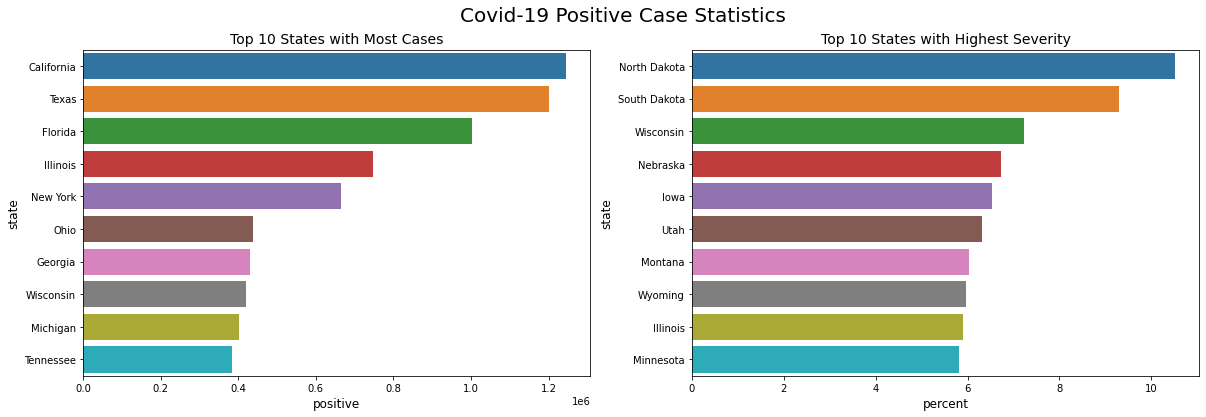

In [22]:

fig, axes = plt.subplots(1, 2, sharex = False, sharey = False, figsize = (20,6))
fig.suptitle("Covid-19 Positive Case Statistics", fontsize = 20)
axes[0].set_title('Top 10 States with Most Cases', fontsize = 14)
axes[0].set_xlabel('positive', fontsize = 12)
axes[0].set_ylabel('state', fontsize = 12)
axes[1].set_title('Top 10 States with Highest Severity', fontsize = 14)
axes[1].set_xlabel('percent', fontsize = 12)
axes[1].set_ylabel('state', fontsize = 12)

sns.barplot(ax = axes[0], data = top10, 
            y = 'state', 
            x = 'positive')

sns.barplot(ax = axes[1], data = top10_percent, 
            y = 'state', 
            x = 'percent')

In [23]:
#death rate.
percent_deaths = cov_cases['death'] / cov_cases['population'] * 100
cov_cases['death rate'] = percent_deaths
cov_cases.head()

date abbrev          state  positive  death  recovered  population  \
0  2020-03-21     WY        Wyoming      23.0    0.0        0.0    578759.0   
1  2020-03-21     MI       Michigan    7023.0   23.0        0.0   9986857.0   
2  2020-03-21     ME          Maine      73.0    0.0        0.0   1344212.0   
3  2020-03-21     MD       Maryland     190.0    3.0        0.0   6045680.0   
4  2020-03-21     MA  Massachusetts     426.0    7.0        0.0   6892503.0   

    percent  death rate  
0  0.003974    0.000000  
1  0.070322    0.000230  
2  0.005431    0.000000  
3  0.003143    0.000050  
4  0.006181    0.000102

In [24]:
# Export the national data csv 
cov_cases.to_csv("cov_cases.csv")

In [25]:
#choro map
fig = px.choropleth(cov_cases,
                    color_continuous_scale = 'magenta',
                    locations='abbrev',
                    color='death',
                    hover_name = 'state',
                    locationmode = 'USA-states',
                    animation_frame = 'date')

fig.update_layout(
title_text = 'Covid-19 Deaths in the United States',
title_x = 0.5,
geo_scope = 'usa',
geo=dict(
showframe = False,
showcoastlines = False))

fig.show()

In [26]:
fig = px.choropleth(cov_cases,
                    color_continuous_scale = 'Turbo',
                    locations='abbrev',
                    color='death rate',
                    hover_name = 'state',
                    locationmode = 'USA-states',
                    animation_frame = 'date')

fig.update_layout(
title_text = 'Covid-19 Death Rate in the United States',
title_x = 0.5,
geo_scope = 'usa',
geo=dict(
showframe = False,
showcoastlines = False))

fig.show()